In [1]:
#importing necessary python packages
import pandas as pd
import numpy as np
from bioinfokit.visuz import cluster
import os

In [2]:
#setting the right directory
os.chdir('C:\\Users\\U0033207PC\\Desktop\\GENE Enrichment\\FINAL VISUALISATION\\ANALYTICS\\RF')

In [3]:
# Importing the dataset
dt = pd.read_csv('RF_PATHWAYS.csv')

In [4]:
dt = dt.drop('HUG0_SYMBOL', axis=1)

In [5]:
X = dt.iloc[:,0:34]

In [6]:
target = dt['OverallSurvivalMonths']

In [7]:
from sklearn.preprocessing import StandardScaler
X_sd = StandardScaler().fit_transform(X)

In [8]:
pd.DataFrame(X_sd, columns=X.columns).head()

,"Alanine, aspartate and glutamate metabolism",Amino sugar and nucleotide sugar metabolism,Arginine and proline metabolism,Cholesterol metabolism,Cysteine and methionine metabolism,D-Glutamine and D-glutamate metabolism,Drug metabolism - cytochrome P450,Drug metabolism - other enzymes,Fatty acid biosynthesis,Biosynthesis of unsaturated fatty acids,...,Pyrimidine metabolism,Pyruvate metabolism,Riboflavin metabolism,Starch and sucrose metabolism,Fatty acid degradation,Folate biosynthesis,Type II diabetes mellitus,"Valine, leucine and isoleucine degradation","Valine, leucine and isoleucine biosynthesis",Taurine and hypotaurine metabolism
0,2.203792,1.304214,0.367878,-1.039627,-0.140093,0.325218,0.719400,0.719400,1.398465,1.398465,...,0.101044,0.620291,-0.236184,-0.588564,2.960722,0.931146,0.529136,0.572175,0.572175,2.795969
1,-0.389457,-0.442078,-0.595019,0.345585,0.126603,-0.687949,-0.682828,-0.682828,-1.384291,-1.384291,...,-0.208310,-0.914364,0.166329,-0.355283,-0.597827,-0.380255,-1.374216,-0.200868,-0.200868,-1.098709
2,1.722274,-0.191331,0.714428,-0.515030,-0.402488,1.107578,0.808302,0.808302,0.268362,0.268362,...,1.432496,0.056320,1.863705,-1.844111,2.021739,0.543060,0.710308,-0.365615,-0.365615,2.306699
3,0.192270,1.760637,0.048203,0.460329,-0.551295,-0.359143,-0.687819,-0.687819,-0.853066,-0.853066,...,0.828518,-0.016860,0.529087,0.356208,-0.523911,-0.012314,-0.745726,0.935702,0.935702,-1.016628
4,-0.081028,-0.021813,-0.680120,0.749317,-0.097158,-0.343795,-0.322587,-0.322587,-0.114363,-0.114363,...,-0.201707,0.101999,0.448156,0.080258,-0.677597,0.056013,-0.811445,-0.367514,-0.367514,-0.615050


In [9]:
from sklearn.decomposition import PCA
pca_out = PCA().fit(X_sd)

In [10]:
# get the component variance
# Proportion of Variance 
pca_out.explained_variance_ratio_

array([3.57371122e-01, 1.27247701e-01, 9.52267574e-02, 6.40835037e-02,
       5.57013479e-02, 4.15941841e-02, 3.47985937e-02, 3.10733606e-02,
       2.64451987e-02, 2.20040013e-02, 2.01119967e-02, 1.64511754e-02,
       1.47324369e-02, 1.38360932e-02, 1.33367730e-02, 1.16912969e-02,
       9.87735255e-03, 9.49393254e-03, 7.65533480e-03, 6.39806666e-03,
       5.79378370e-03, 4.26585814e-03, 3.54991226e-03, 2.66948939e-03,
       2.15898865e-03, 1.31450653e-03, 1.11723258e-03, 5.21101052e-20,
       1.14286878e-20, 7.04790266e-32, 1.68361821e-33, 1.68361821e-33,
       1.68361821e-33, 1.68361821e-33])

In [11]:
# Cumulative proportion of variance 
np.cumsum(pca_out.explained_variance_ratio_)

array([0.35737112, 0.48461882, 0.57984558, 0.64392908, 0.69963043,
       0.74122462, 0.77602321, 0.80709657, 0.83354177, 0.85554577,
       0.87565777, 0.89210894, 0.90684138, 0.92067747, 0.93401425,
       0.94570554, 0.95558289, 0.96507683, 0.97273216, 0.97913023,
       0.98492401, 0.98918987, 0.99273978, 0.99540927, 0.99756826,
       0.99888277, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        ])

In [12]:
# get component loadings (correlation coefficient between original variables and the component) 
# the squared loadings within the PCs always sums to 1

loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = X.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34
variable,,,,,,,,,,,,,,,,,,,,,
"Alanine, aspartate and glutamate metabolism",0.205800,-0.023539,-0.080966,0.074172,-0.108408,-0.274778,-0.086744,0.226411,0.175216,-0.125686,...,0.025364,0.080347,0.042815,1.238118e-11,7.913332e-11,1.636933e-16,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00
Amino sugar and nucleotide sugar metabolism,0.075414,-0.020803,-0.021511,-0.090946,-0.361703,0.354324,0.305153,-0.224081,-0.049555,0.187723,...,0.051599,0.075786,-0.017530,-1.138216e-11,3.653144e-11,-3.286422e-17,1.376993e-16,1.183008e-16,-6.081911e-17,-3.607322e-18
Arginine and proline metabolism,0.141830,-0.032887,0.168556,-0.058025,0.078193,0.273033,-0.351630,0.462232,0.066444,-0.107182,...,-0.033255,0.019234,0.030673,2.654330e-11,-3.525876e-11,2.072530e-16,-1.375732e-16,-6.702249e-17,5.428925e-17,-9.239312e-17
Cholesterol metabolism,-0.036259,-0.112453,-0.292359,-0.073430,0.008759,-0.104212,-0.428715,-0.390178,-0.094616,-0.208604,...,-0.026993,-0.100685,-0.053214,-4.696982e-11,1.377724e-11,3.028777e-17,2.671615e-16,-1.423177e-17,-5.695481e-17,-2.552384e-17
Cysteine and methionine metabolism,0.150028,-0.105574,-0.057559,-0.072665,0.307746,0.110685,0.061359,-0.074776,0.351669,0.302887,...,-0.026654,0.022980,-0.002575,-3.521267e-11,2.789673e-11,-2.345120e-16,9.869259e-17,-2.001940e-17,-2.219228e-16,-2.186312e-17
D-Glutamine and D-glutamate metabolism,0.145151,0.105984,0.285948,0.073105,-0.025595,-0.073071,-0.237550,0.177052,0.375188,-0.014268,...,0.079727,-0.115580,-0.058537,-1.419254e-10,-2.464739e-11,-1.219543e-16,1.408786e-16,-1.360407e-16,-6.996347e-17,-2.272816e-17
Drug metabolism - cytochrome P450,0.249035,-0.019334,-0.034024,0.063760,0.101241,0.032755,-0.086522,0.071549,-0.120203,0.097561,...,-0.056054,0.030844,-0.042116,7.415636e-03,-1.698989e-02,-3.790869e-01,-4.721059e-02,4.932032e-01,1.910936e-01,2.725768e-01
Drug metabolism - other enzymes,0.249035,-0.019334,-0.034024,0.063760,0.101241,0.032755,-0.086522,0.071549,-0.120203,0.097561,...,-0.056054,0.030844,-0.042116,7.415655e-03,-1.698990e-02,3.790869e-01,4.721059e-02,-4.932032e-01,-1.910936e-01,-2.725768e-01
Fatty acid biosynthesis,0.198852,-0.013326,-0.229861,0.283164,-0.064191,0.047333,-0.191931,-0.150525,0.000120,-0.050572,...,-0.014738,0.081099,0.089568,1.393075e-02,-3.191651e-02,-2.055977e-01,-5.850735e-01,-1.836626e-01,2.052797e-01,-1.988640e-01


In [13]:
loadings_df.to_csv(r'C:\Users\U0033207PC\Desktop\GENE Enrichment\FINAL VISUALISATION\ANALYTICS\RF\RF_loadings_df.csv')

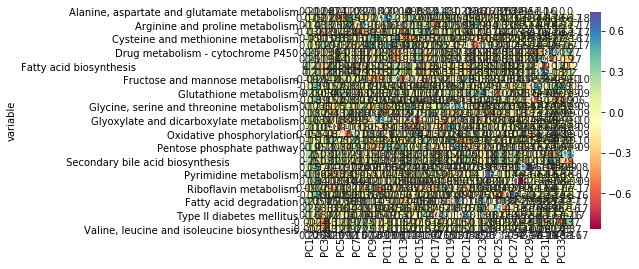

In [14]:
# positive and negative values in component loadings reflects the positive and negative correlation of the variables
# with then PCs. 

# get correlation matrix plot for loadings
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.savefig(r'C:\Users\U0033207PC\Desktop\GENE Enrichment\FINAL VISUALISATION\ANALYTICS\PLOTS\RF_PATHWAYS_CORRELATION.pdf', bbox_inches="tight")
plt.show()


In [15]:
var = loadings_df
var.style.background_gradient(cmap='coolwarm').set_precision(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34
variable,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Alanine, aspartate and glutamate metabolism",0.21,-0.02,-0.08,0.07,-0.11,-0.27,-0.09,0.23,0.18,-0.13,0.22,-0.01,-0.01,-0.20,-0.08,0.13,0.41,0.43,0.10,0.02,-0.09,0.36,-0.26,-0.23,0.03,0.08,0.04,0.00,0.00,0.00,0.00,-0.00,0.00,0.00
Amino sugar and nucleotide sugar metabolism,0.08,-0.02,-0.02,-0.09,-0.36,0.35,0.31,-0.22,-0.05,0.19,0.53,0.23,-0.11,0.27,0.10,-0.14,-0.03,0.09,0.25,-0.05,0.03,0.12,0.00,-0.10,0.05,0.08,-0.02,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00
Arginine and proline metabolism,0.14,-0.03,0.17,-0.06,0.08,0.27,-0.35,0.46,0.07,-0.11,0.07,0.11,-0.07,0.19,0.13,0.17,-0.44,-0.17,-0.06,-0.10,0.03,0.39,-0.09,-0.10,-0.03,0.02,0.03,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00
Cholesterol metabolism,-0.04,-0.11,-0.29,-0.07,0.01,-0.10,-0.43,-0.39,-0.09,-0.21,0.10,0.04,-0.41,0.19,0.17,0.40,0.11,-0.12,0.11,0.10,0.02,-0.11,-0.10,0.02,-0.03,-0.10,-0.05,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00
Cysteine and methionine metabolism,0.15,-0.11,-0.06,-0.07,0.31,0.11,0.06,-0.07,0.35,0.30,-0.12,0.43,-0.32,-0.38,-0.01,-0.03,-0.21,0.13,0.06,0.15,-0.03,-0.16,-0.26,0.04,-0.03,0.02,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00
D-Glutamine and D-glutamate metabolism,0.15,0.11,0.29,0.07,-0.03,-0.07,-0.24,0.18,0.38,-0.01,0.34,0.09,0.02,0.23,0.00,0.02,0.10,0.20,-0.15,-0.10,0.05,-0.54,0.19,0.18,0.08,-0.12,-0.06,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00
Drug metabolism - cytochrome P450,0.25,-0.02,-0.03,0.06,0.10,0.03,-0.09,0.07,-0.12,0.10,0.11,-0.39,-0.14,-0.11,0.27,-0.27,-0.00,-0.04,0.12,-0.04,-0.05,-0.12,-0.08,0.00,-0.06,0.03,-0.04,0.01,-0.02,-0.38,-0.05,0.49,0.19,0.27
Drug metabolism - other enzymes,0.25,-0.02,-0.03,0.06,0.10,0.03,-0.09,0.07,-0.12,0.10,0.11,-0.39,-0.14,-0.11,0.27,-0.27,-0.00,-0.04,0.12,-0.04,-0.05,-0.12,-0.08,0.00,-0.06,0.03,-0.04,0.01,-0.02,0.38,0.05,-0.49,-0.19,-0.27
Fatty acid biosynthesis,0.20,-0.01,-0.23,0.28,-0.06,0.05,-0.19,-0.15,0.00,-0.05,-0.12,0.21,0.10,0.10,-0.01,-0.25,-0.00,0.01,-0.18,-0.13,-0.22,0.03,0.03,-0.02,-0.01,0.08,0.09,0.01,-0.03,-0.21,-0.59,-0.18,0.21,-0.20


In [16]:
# get eigenvalues 
pca_out.explained_variance_

array([1.21741658e+01, 4.33480638e+00, 3.24398438e+00, 2.18306168e+00,
       1.89751607e+00, 1.41694296e+00, 1.18544512e+00, 1.05854173e+00,
       9.00879270e-01, 7.49585920e-01, 6.85133096e-01, 5.60423956e-01,
       5.01873598e-01, 4.71338848e-01, 4.54329062e-01, 3.98274450e-01,
       3.36480820e-01, 3.23419276e-01, 2.60785805e-01, 2.17955844e-01,
       1.97370407e-01, 1.45320261e-01, 1.20930926e-01, 9.09385359e-02,
       7.35478731e-02, 4.47798367e-02, 3.80595238e-02, 1.77517719e-18,
       3.89328438e-19, 2.40093087e-30, 5.73539551e-32, 5.73539551e-32,
       5.73539551e-32, 5.73539551e-32])

In [17]:
# get scree plot (for scree or elbow test)
cluster.screeplot(obj=[pc_list, pca_out.explained_variance_ratio_])

In [18]:
# get PCA loadings plots (2D and 3D)
# 2D

cluster.pcaplot(x=loadings[0], y=loadings[1], labels=X.columns.values, 
var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
var2=round(pca_out.explained_variance_ratio_[1]*100, 2))

In [19]:
# 3D
cluster.pcaplot(x=loadings[0], y=loadings[1], z=loadings[2],  labels=X.columns.values, 
var1=round(pca_out.explained_variance_ratio_[0]*100, 2), var2=round(pca_out.explained_variance_ratio_[1]*100, 2), 
var3=round(pca_out.explained_variance_ratio_[2]*100, 2))

In [20]:
# get PC scores
pca_scores = PCA().fit_transform(X_sd)

In [21]:
# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=X.columns.values, var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
var2=round(pca_out.explained_variance_ratio_[1]*100, 2))

In [22]:
# get 3D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=X.columns.values, 
var1=round(pca_out.explained_variance_ratio_[0]*100, 2), var2=round(pca_out.explained_variance_ratio_[1]*100, 2), 
var3=round(pca_out.explained_variance_ratio_[2]*100, 2))